In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
iris_dataset = load_iris()

X, y = iris_dataset['data'], iris_dataset['target']

X_df = pd.DataFrame(X, columns = iris_dataset['feature_names'])
y_df = pd.DataFrame(y, columns = ['Type'])

iris_df = X_df.join(y_df)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

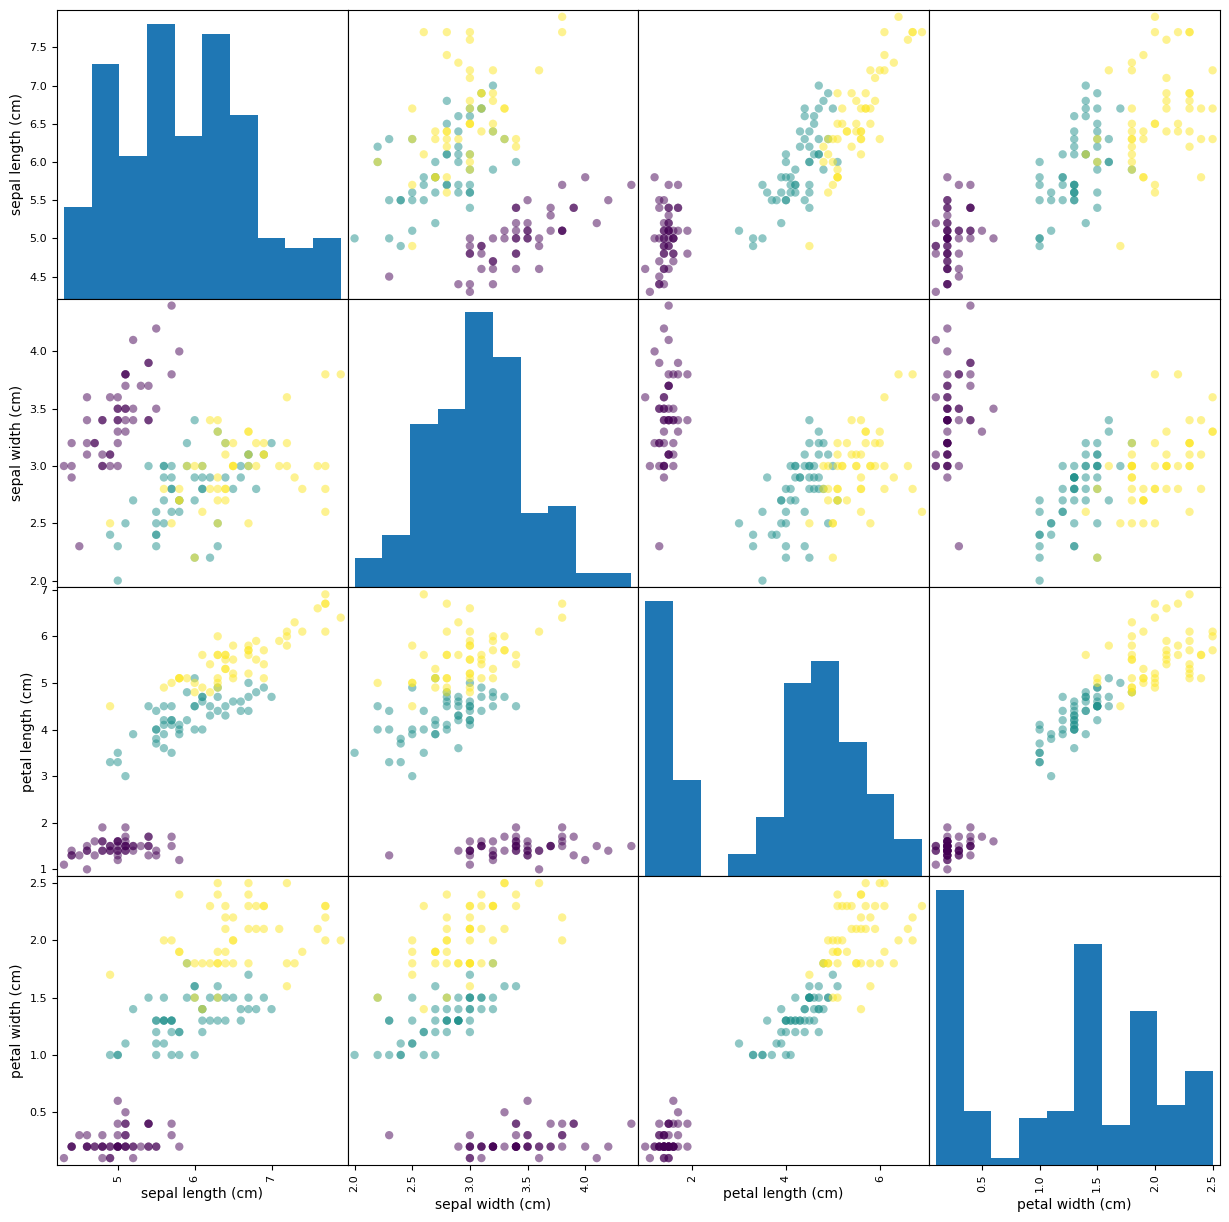

In [3]:
pd.plotting.scatter_matrix(X_df, c = y_df.values, figsize = (15, 15), marker = 'o')

In [4]:
X_selected_df = X_df[['petal width (cm)', 'sepal width (cm)']]

iris_selected_df = X_selected_df.join(y_df)

iris_selected_df = iris_selected_df[iris_selected_df['Type'] != 2]

X_selected_df = iris_selected_df.drop(['Type'], axis = 1)
y_selected_df = iris_selected_df[['Type']]

<AxesSubplot:xlabel='sepal width (cm)', ylabel='petal width (cm)'>

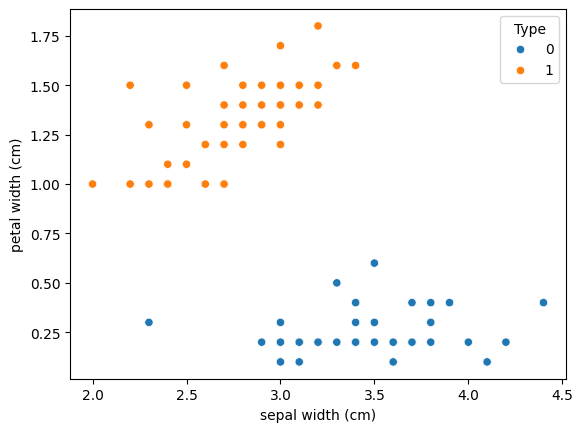

In [5]:
sns.scatterplot(iris_selected_df, x = 'sepal width (cm)', y = 'petal width (cm)', hue = 'Type',
                palette = 'tab10', markers = 'species')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y_selected_df, test_size = 0.3, random_state = 13)

y_train

,Type
39,0
27,0
42,0
13,0
8,0
...,...
25,0
16,0
74,1
48,0


In [7]:
# SVM使用线性核函数 = SVC
svm_clf = SVC(kernel = 'linear', C = 999999)

svm_clf.fit(X_train, y_train)

# 查看精度
print('SVC accuracy is: {}'.format(svm_clf.score(X_test, y_test)))

SVC accuracy is: 1.0


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

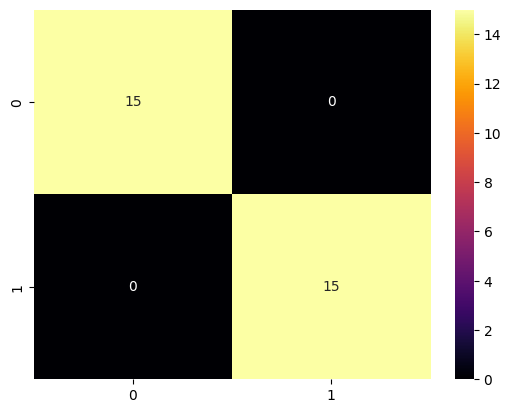

In [8]:
# 生成混淆矩阵热力图
y_pred = svm_clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred, labels = [0, 1])

sns.heatmap(conf_matrix, annot = True, cmap = 'inferno', xticklabels = [0, 1], yticklabels = [0, 1])

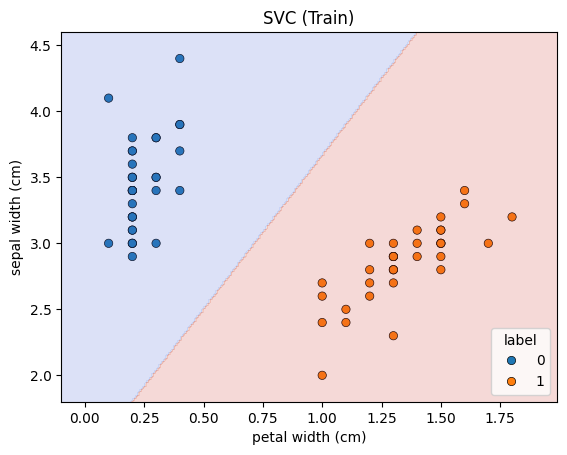

In [9]:
# 绘制决策边界
import sys
sys.path.append("../..")

from ToolKit.ML import plot_decision_boundary2F2D

plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (Train)')

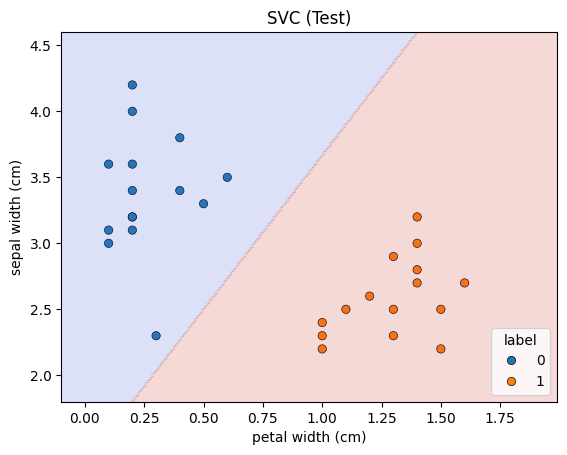

In [10]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'test', 'SVC (Test)')

增加一个黄色数据点在右上，会发现SVC对于支持向量变化非常敏感

In [11]:
iris_selected_df

,petal width (cm),sepal width (cm),Type
0,0.2,3.5,0
1,0.2,3.0,0
2,0.2,3.2,0
3,0.2,3.1,0
4,0.2,3.6,0
...,...,...,...
95,1.2,3.0,1
96,1.3,2.9,1
97,1.3,2.9,1
98,1.1,2.5,1


In [12]:
new_row = {'petal width (cm)': 0.25, 'sepal width (cm)': 2.5, 'Type': 1}

iris_selected_df.loc[len(iris_selected_df.index)] = new_row

iris_selected_df

,petal width (cm),sepal width (cm),Type
0,0.20,3.5,0
1,0.20,3.0,0
2,0.20,3.2,0
3,0.20,3.1,0
4,0.20,3.6,0
...,...,...,...
96,1.30,2.9,1
97,1.30,2.9,1
98,1.10,2.5,1
99,1.30,2.8,1


In [13]:
'''
做一样的事情
'''

X_selected_df = iris_selected_df.drop(['Type'], axis = 1)
y_selected_df = iris_selected_df[['Type']]

X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y_selected_df, test_size = 0.3, random_state = 13)

X_test

,petal width (cm),sepal width (cm)
37,0.1,3.6
93,1.0,2.3
84,1.5,3.0
14,0.2,4.0
43,0.6,3.5
9,0.1,3.1
44,0.4,3.8
31,0.4,3.4
70,1.8,3.2
57,1.0,2.4


In [14]:
# SVM使用线性核函数 = SVC
svm_clf = SVC(kernel = 'linear', C = 999999)

svm_clf.fit(X_train, y_train)

# 查看精度
print('SVC accuracy is: {}'.format(svm_clf.score(X_test, y_test)))

SVC accuracy is: 0.967741935483871


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


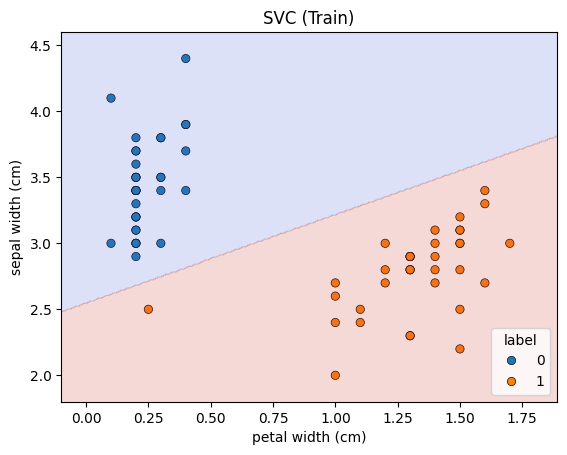

In [15]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (Train)')

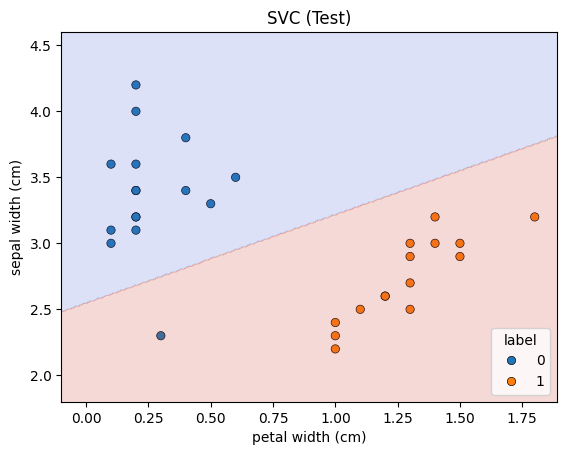

In [16]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'test', 'SVC (Test)')

Decision Function Distances(sorted) for all samples:


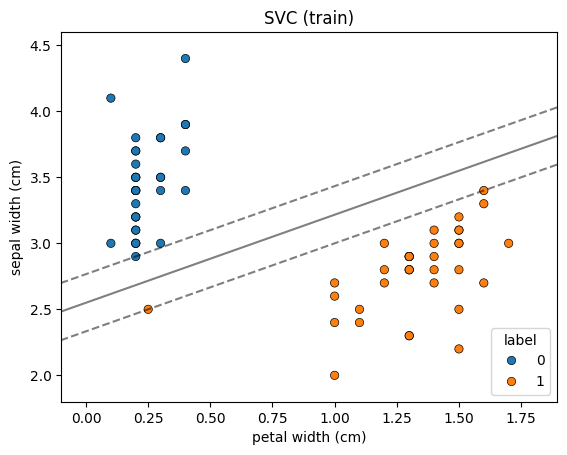

In [17]:
from ToolKit.ML import plot_soft_margin_svc2F2D

d = plot_soft_margin_svc2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (train)')

In [18]:
for dist in d:
    if abs(dist) <= 1.01:
        print(dist)

-0.9999840177618946
0.999959493576549
1.000032153395205


In [19]:
# SVM使用线性核函数 = SVC
svm_clf = SVC(kernel = 'linear', C = 3)

svm_clf.fit(X_train, y_train)

# 查看精度
print('SVC accuracy is: {}'.format(svm_clf.score(X_test, y_test)))

SVC accuracy is: 0.967741935483871


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


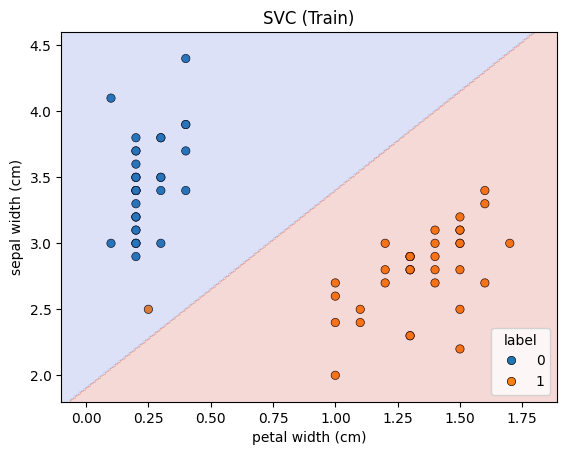

In [20]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (Train)')

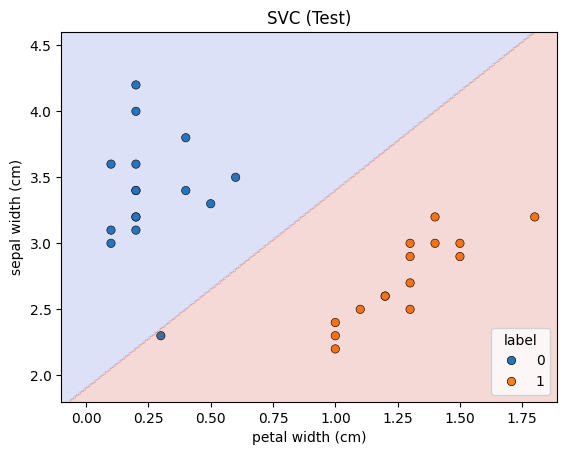

In [21]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'test', 'SVC (Test)')

Decision Function Distances(sorted) for all samples:


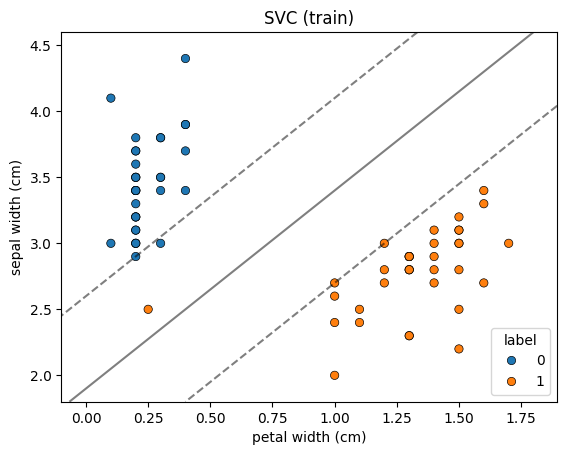

In [22]:
d = plot_soft_margin_svc2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (train)')

In [23]:
for dist in d:
    if abs(dist) <= 1.01:
        print(dist)

-0.9994687172773911
-0.928068610128356
-0.32116848823257405
0.999732529848814
0.9997327051534737


蓝点   -0.99946872   |   -0.92806861 -0.32116849   || |   0.99973253 0.99973271   橘点

In [36]:
# SVM使用线性核函数 = SVC
svm_clf = SVC(kernel = 'linear', C = 0.1)

svm_clf.fit(X_train, y_train)

# 查看精度
print('SVC accuracy is: {}'.format(svm_clf.score(X_test, y_test)))

SVC accuracy is: 1.0


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Function Distances(sorted) for all samples:


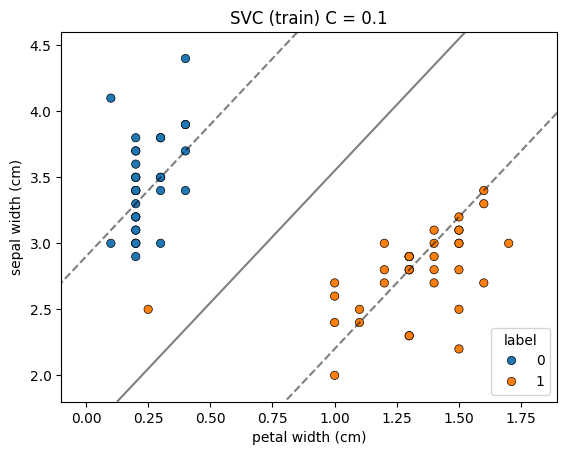

In [37]:
d = plot_soft_margin_svc2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (train) C = 0.1')

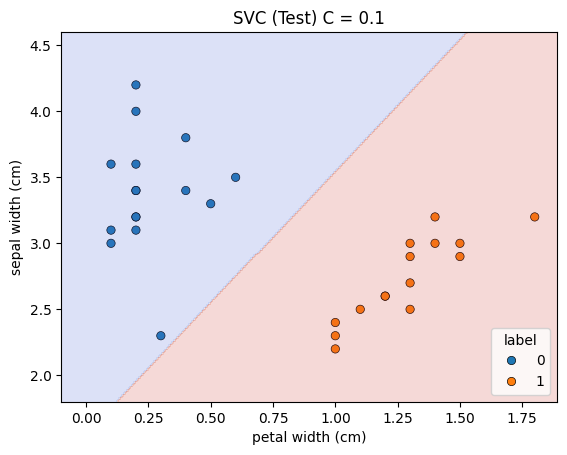

In [38]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'test', 'SVC (Test) C = 0.1')

In [27]:
# SVM使用线性核函数 = SVC
svm_clf = SVC(kernel = 'linear', C = 1)

svm_clf.fit(X_train, y_train)

# 查看精度
print('SVC accuracy is: {}'.format(svm_clf.score(X_test, y_test)))

SVC accuracy is: 1.0


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Function Distances(sorted) for all samples:


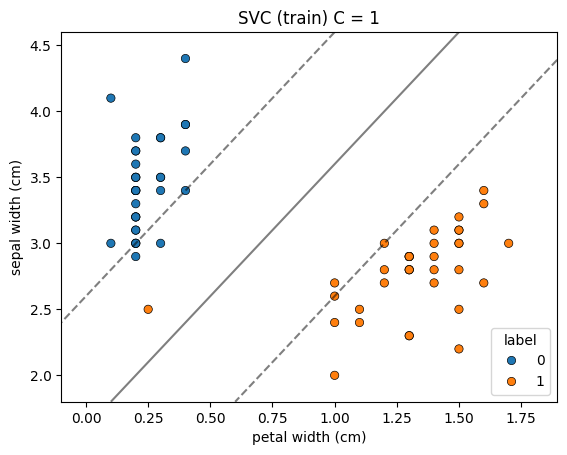

In [28]:
d = plot_soft_margin_svc2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (train) C = 1')

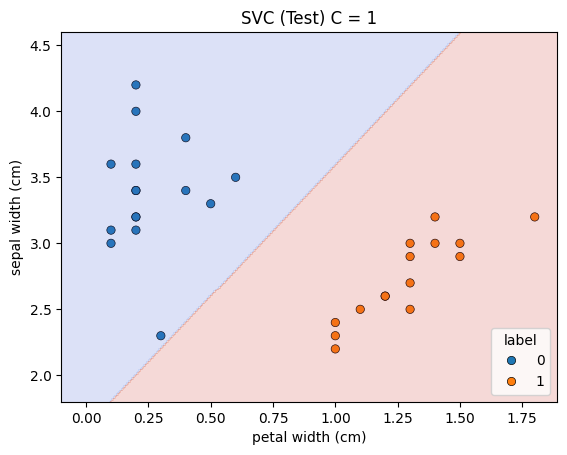

In [29]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'test', 'SVC (Test) C = 1')

In [30]:
# SVM使用线性核函数 = SVC
svm_clf = SVC(kernel = 'linear', C = 3)

svm_clf.fit(X_train, y_train)

# 查看精度
print('SVC accuracy is: {}'.format(svm_clf.score(X_test, y_test)))

SVC accuracy is: 0.967741935483871


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Function Distances(sorted) for all samples:


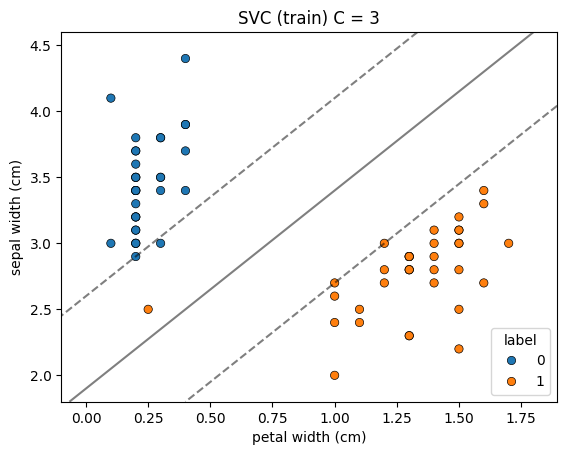

In [31]:
d = plot_soft_margin_svc2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (train) C = 3')

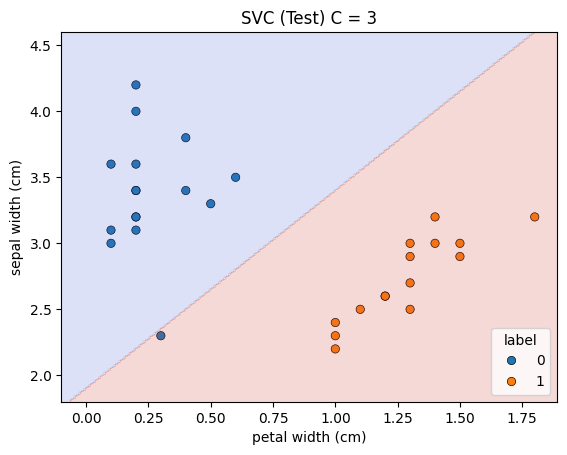

In [32]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'test', 'SVC (Test) C = 3')

In [33]:
# SVM使用线性核函数 = SVC
svm_clf = SVC(kernel = 'linear', C = 999)

svm_clf.fit(X_train, y_train)

# 查看精度
print('SVC accuracy is: {}'.format(svm_clf.score(X_test, y_test)))

SVC accuracy is: 0.967741935483871


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Function Distances(sorted) for all samples:


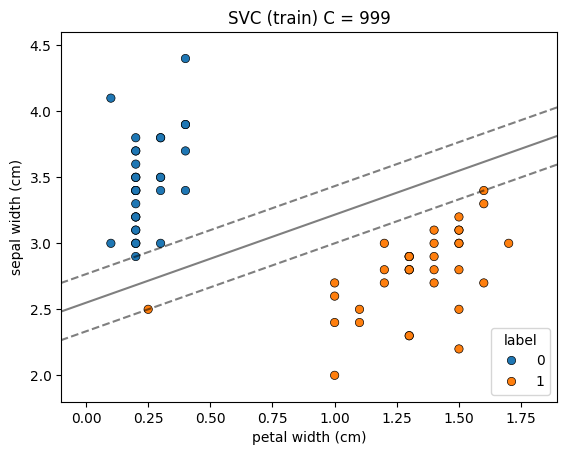

In [34]:
d = plot_soft_margin_svc2F2D(X_train, X_test, y_train, y_test, svm_clf, 'train', 'SVC (train) C = 999')

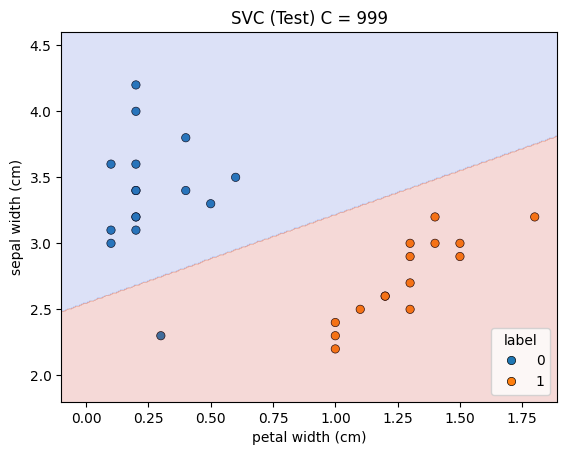

In [35]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, svm_clf, 'test', 'SVC (Test) C = 999')